In [74]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from matplotlib import pyplot as plt
import matplotlib
import cv2
import numpy as np
import pandas as pd
from collections import deque, namedtuple
from matplotlib import pyplot as plt, patches
import torch
from REACTRL import RealExpEnv, Episode_Memory, Createc_Controller, sac_agent, ReplayMemory, HerReplayMemory
from REACTRL import plot_graph, show_reset, show_done, show_step, image_detect_edges, image_process
matplotlib.rcParams['image.cmap'] = 'gray'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
from matplotlib import pyplot as plt, patches

# Python code to demonstrate namedtuple()
from collections import namedtuple

import pickle

cpu


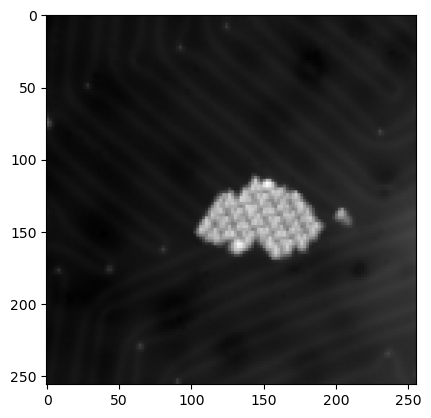

In [139]:
img=cv2.imread('selected_regions.jpeg')

img2=cv2.imread('selected_regions.jpeg')
plt.imshow(img)

In [140]:
img[img<190]=0

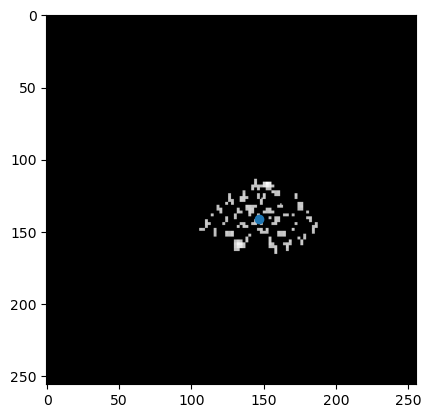

In [162]:
plt.imshow(img)
plt.scatter([147], [141])

In [145]:
img.shape

(256, 256, 3)

In [159]:
np.median(np.where(img>190)[1])

147.0

In [164]:
np.where(img>190)[1].shape

(1962,)

In [185]:
data ={'x': np.where(img>190)[0], 'y': np.where(img>190)[1]}
data=pd.DataFrame(data)

In [192]:
data=data.drop_duplicates(ignore_index=True)

In [193]:
data

,x,y
0,114,144
1,114,145
2,115,144
3,115,145
4,116,144
...,...,...
649,163,167
650,164,158
651,164,159
652,165,158


In [194]:
data.loc[:, 'dist']=np.sqrt((data.x-147)**2+(data.y-141)**2)

In [195]:
data=data.sort_values(by='dist', ascending=False, ignore_index=True)

In [196]:
data

,x,y,dist
0,144,187,46.097722
1,146,187,46.010868
2,147,187,46.000000
3,145,186,45.044423
4,146,186,45.011110
...,...,...,...
649,147,138,3.000000
650,145,143,2.828427
651,145,142,2.236068
652,146,139,2.236068


In [150]:
np.where(img>190)[1].mean()

147.31957186544344

In [151]:
np.where(img>190)[2].mean()

1.0

In [202]:
np.random.rand()

0.8520160939473498

In [223]:
check_points=[[data['x'][i], data['y'][i]] for i in range(len(data))]

In [208]:
check_points=np.array(check_points)

In [225]:
check_points.remove([144, 187])

In [226]:
check_points

[[146, 187],
 [147, 187],
 [145, 186],
 [146, 186],
 [147, 186],
 [151, 185],
 [150, 185],
 [149, 185],
 [148, 185],
 [151, 184],
 [150, 184],
 [149, 184],
 [148, 184],
 [140, 183],
 [141, 183],
 [142, 183],
 [143, 183],
 [140, 182],
 [141, 182],
 [142, 182],
 [143, 182],
 [140, 181],
 [141, 181],
 [130, 177],
 [140, 180],
 [141, 180],
 [124, 173],
 [131, 177],
 [132, 177],
 [130, 176],
 [155, 179],
 [125, 173],
 [154, 179],
 [133, 177],
 [124, 172],
 [131, 176],
 [134, 177],
 [126, 173],
 [132, 176],
 [130, 175],
 [125, 172],
 [135, 177],
 [159, 177],
 [155, 178],
 [127, 173],
 [133, 176],
 [154, 178],
 [158, 177],
 [131, 175],
 [126, 172],
 [157, 177],
 [134, 176],
 [132, 175],
 [130, 174],
 [156, 177],
 [135, 176],
 [159, 176],
 [127, 172],
 [133, 175],
 [158, 176],
 [131, 174],
 [134, 175],
 [157, 176],
 [132, 174],
 [156, 176],
 [135, 175],
 [133, 174],
 [134, 174],
 [135, 174],
 [149, 106],
 [148, 106],
 [155, 175],
 [154, 175],
 [149, 107],
 [116, 155],
 [148, 107],
 [155, 174],

In [222]:
check_points==[np.array([144,187])].all

AttributeError: 'list' object has no attribute 'all'

In [216]:
check_points.shape

(654, 2)

In [215]:
np.delete(check_points, np.where(check_points==np.array([144,187]))).shape

(1285,)

In [234]:
data

,x,y,dist
0,144,187,46.097722
1,146,187,46.010868
2,147,187,46.000000
3,145,186,45.044423
4,146,186,45.011110
...,...,...,...
649,147,138,3.000000
650,145,143,2.828427
651,145,142,2.236068
652,146,139,2.236068


In [235]:
check_points=[[data['x'][i], data['y'][i]] for i in range(len(data))]

In [236]:
check_points

[[144, 187],
 [146, 187],
 [147, 187],
 [145, 186],
 [146, 186],
 [147, 186],
 [151, 185],
 [150, 185],
 [149, 185],
 [148, 185],
 [151, 184],
 [150, 184],
 [149, 184],
 [148, 184],
 [140, 183],
 [141, 183],
 [142, 183],
 [143, 183],
 [140, 182],
 [141, 182],
 [142, 182],
 [143, 182],
 [140, 181],
 [141, 181],
 [130, 177],
 [140, 180],
 [141, 180],
 [124, 173],
 [131, 177],
 [132, 177],
 [130, 176],
 [155, 179],
 [125, 173],
 [154, 179],
 [133, 177],
 [124, 172],
 [131, 176],
 [134, 177],
 [126, 173],
 [132, 176],
 [130, 175],
 [125, 172],
 [135, 177],
 [159, 177],
 [155, 178],
 [127, 173],
 [133, 176],
 [154, 178],
 [158, 177],
 [131, 175],
 [126, 172],
 [157, 177],
 [134, 176],
 [132, 175],
 [130, 174],
 [156, 177],
 [135, 176],
 [159, 176],
 [127, 172],
 [133, 175],
 [158, 176],
 [131, 174],
 [134, 175],
 [157, 176],
 [132, 174],
 [156, 176],
 [135, 175],
 [133, 174],
 [134, 174],
 [135, 174],
 [149, 106],
 [148, 106],
 [155, 175],
 [154, 175],
 [149, 107],
 [116, 155],
 [148, 107],

In [232]:
[data['x'][i], data['y'][i]]

[144, 187]

In [ ]:
    env.createc_controller.offset_nm = np.array([x_nm-250/2+edges_points[1][i]*250/128, y_nm+edges_points[0][i]*250/128])
    env.createc_controller.im_size_nm= 8
    scan_data=env.createc_controller.scan_image()
    plt.imsave('images_scan/image_forward_%s.png' % i, scan_data[0])
    plt.imsave('images_scan/image_backward_%s.png' % i, scan_data[1])
    plt.imsave('images_scan/image_for_back_%s.png' % i, (scan_data[0]+scan_data[1])/2)

(-151.536, -101.536)

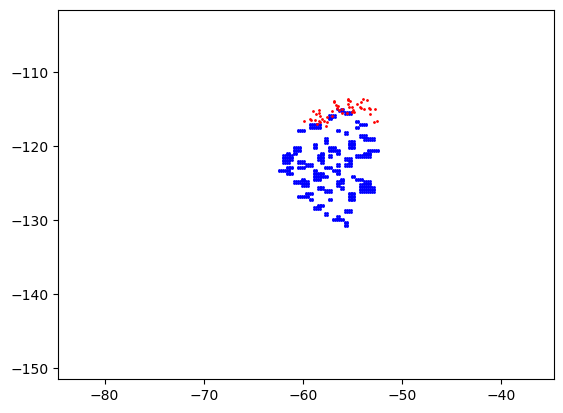

In [244]:
ref_x=147
ref_y=141
x_nm=-59.699
y_nm=-151.536
len_nm=50  # nm
init_len=2 # nm
move_len=5 # nm
check_points_full=[[data['x'][i], data['y'][i]] for i in range(len(data))]

move_points=[]
plt.scatter(x_nm-len_nm/2+len_nm/256*data['x'], y_nm+len_nm/256*data['y'], s=1, c='b')
data_move_all=[]
tip_form_x=133
tip_form_y=-117
tip_len=200
tip_points=[]
tip_points.append([tip_form_x, tip_form_y])
# for i in range(len(data)):
for i in range(50):
    x=x_nm-len_nm/2+len_nm/256*data['x'][i]
    y=y_nm+len_nm/256*data['y'][i]
    check_points=[[data['x'][i], data['y'][i]] for i in range(len(data))]
    check_points.remove([data['x'][i], data['y'][i]])
    for epoch in range(10):
        tip_start_x=x+init_len*np.random.rand()
        tip_start_y=y+init_len*np.random.rand()
        tip_end_x=tip_start_x+move_len*np.random.rand()
        tip_end_y=tip_start_y+move_len*np.random.rand()
        check_points_array=np.array(check_points)
        env.createc_controller.offset_nm = np.array([x, y-len_nm/2])
        env.createc_controller.im_size_nm= 8
        scan_data=env.createc_controller.scan_image()
        plt.imsave('images_move_before/image_forward_%s.png' % i, scan_data[0])
        plt.imsave('images_move_before/image_backward_%s.png' % i, scan_data[1])
        plt.imsave('images_move_before/image_for_back_%s.png' % i, (scan_data[0]+scan_data[1])/2)
        while np.sqrt((check_points_array[:, 0]-tip_end_x)**2+(check_points_array[:, 1]-tip_end_y)**2).min()<3:
            tip_end_x=tip_start_x+move_len*np.random.rand()
            tip_end_y=tip_start_y+move_len*np.random.rand()
        check_points_full.append([tip_end_x, tip_end_y])
        move_points.append([tip_end_x, tip_end_y])
        plt.scatter([tip_start_x], [tip_start_y], s=1, c='r')
        data=env.createc_controller.lat_manipulation(tip_start_x, tip_start_y, tip_end_x, tip_end_x, 32, 1000, np.array([x, y-len_nm/2]), 10)
        data_move_all.append(data)
        env.createc_controller.offset_nm = np.array([x, y-len_nm/2])
        env.createc_controller.im_size_nm= 8
        scan_data=env.createc_controller.scan_image()
        plt.imsave('images_move_after/image_forward_%s.png' % i, scan_data[0])
        plt.imsave('images_move_after/image_backward_%s.png' % i, scan_data[1])
        plt.imsave('images_move_after/image_for_back_%s.png' % i, (scan_data[0]+scan_data[1])/2)

        if epoch==5:
            tip_x=tip_form_x+100*np.random.rand()
            tip_y=tip_form_y+100*np.random.rand()
            check_tip_points_array=np.array(tip_points)
            while np.sqrt((check_tip_points_array[:, 0]-tip_x)**2+(check_tip_points_array[:, 1]-tip_y)**2).min()<5:
                tip_x=tip_form_x+100*np.random.rand()
                tip_y=tip_form_y+100*np.random.rand()
            env.createc_controller.tip_form(15, tip_x, tip_y)  

with open("data_move.pkl", "wb") as fp:   #Pickling
    pickle.dump(data_move_all, fp)
plt.xlim(x_nm-len_nm/2, x_nm+len_nm/2)
plt.ylim(y_nm, y_nm+len_nm)
        
        

In [198]:
check_points

[[144, 187],
 [146, 187],
 [147, 187],
 [145, 186],
 [146, 186],
 [147, 186],
 [151, 185],
 [150, 185],
 [149, 185],
 [148, 185],
 [151, 184],
 [150, 184],
 [149, 184],
 [148, 184],
 [140, 183],
 [141, 183],
 [142, 183],
 [143, 183],
 [140, 182],
 [141, 182],
 [142, 182],
 [143, 182],
 [140, 181],
 [141, 181],
 [130, 177],
 [140, 180],
 [141, 180],
 [124, 173],
 [131, 177],
 [132, 177],
 [130, 176],
 [155, 179],
 [125, 173],
 [154, 179],
 [133, 177],
 [124, 172],
 [131, 176],
 [134, 177],
 [126, 173],
 [132, 176],
 [130, 175],
 [125, 172],
 [135, 177],
 [159, 177],
 [155, 178],
 [127, 173],
 [133, 176],
 [154, 178],
 [158, 177],
 [131, 175],
 [126, 172],
 [157, 177],
 [134, 176],
 [132, 175],
 [130, 174],
 [156, 177],
 [135, 176],
 [159, 176],
 [127, 172],
 [133, 175],
 [158, 176],
 [131, 174],
 [134, 175],
 [157, 176],
 [132, 174],
 [156, 176],
 [135, 175],
 [133, 174],
 [134, 174],
 [135, 174],
 [149, 106],
 [148, 106],
 [155, 175],
 [154, 175],
 [149, 107],
 [116, 155],
 [148, 107],

In [160]:

for i in range(len(data)):
    if np.where(img>190)[1][i]==ref_x:
        if np.where(img>190)[2][i]==ref_y:
            print(i)

In [144]:
np.where(img[img>190])[0].mean()

980.5

In [ ]:
np.where(img[img>190])[0].mean()

In [136]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('selected_regions.jpeg')
# img[img<190]=0
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# noise removal
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

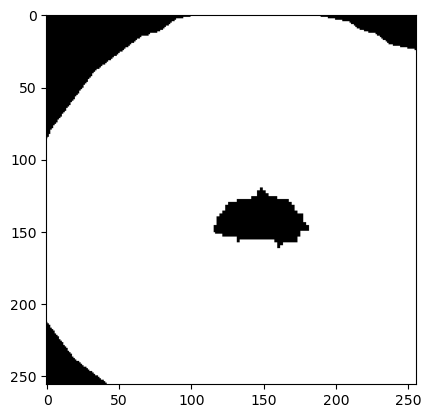

In [138]:
plt.imshow(unknown)

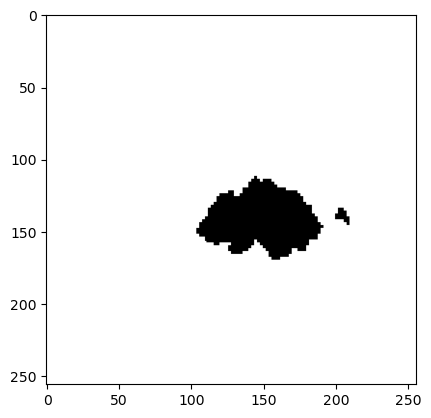

In [135]:
plt.imshow(thresh)

In [ ]:
ref_x=
ref_y=

In [126]:
len(np.where(img[img>210])[0])

180

[]

<Figure size 640x480 with 0 Axes>

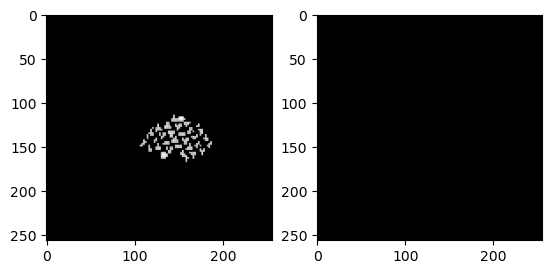

In [109]:
image_process(img)

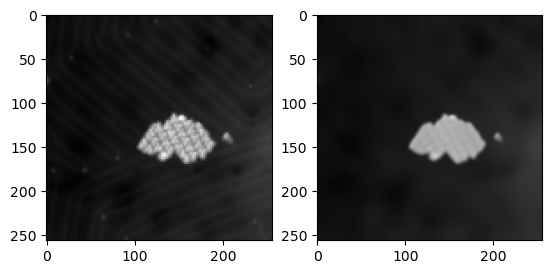

In [44]:
# dst= cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
dst=cv2.fastNlMeansDenoising(img, None, 30, 7, 21) 
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

In [45]:
img=dst

(Text(0.5, 1.0, 'Sobel abs(CV_64F)'), ([], []), ([], []))

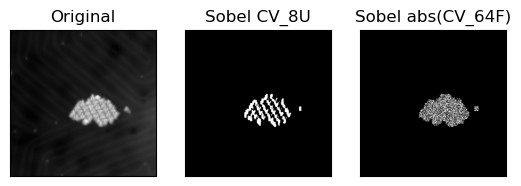

In [69]:
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img2,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])


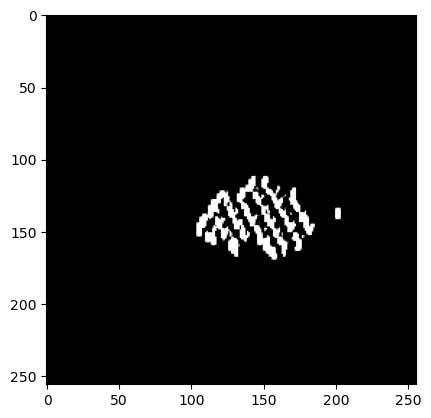

In [70]:
plt.imshow(sobelx8u,cmap = 'gray')

In [72]:
edges=image_detect_edges(sobelx8u)

[]

<Figure size 640x480 with 0 Axes>

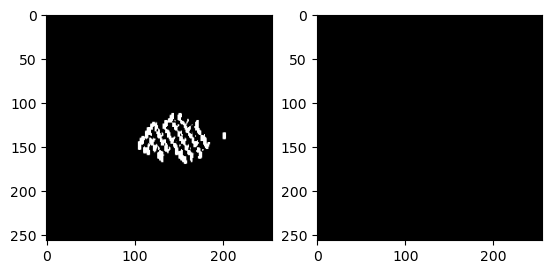

In [81]:
image_process(sobelx8u, kernal_v=9)

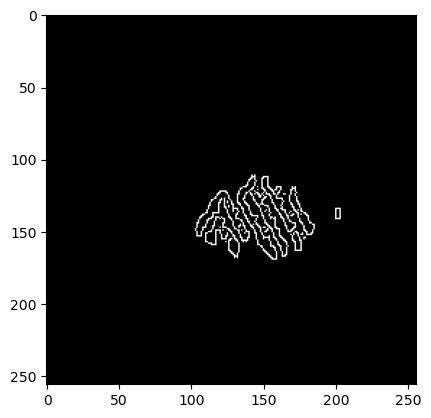

In [73]:
plt.imshow(edges,cmap = 'gray')

In [57]:
sobelx8u[sobelx8u<150]=0
# sobelx8u[sobelx8u>150]=255

In [54]:
sobel_8u[sobel_8u<150]=0
# sobel_8u[sobel_8u>150]=255

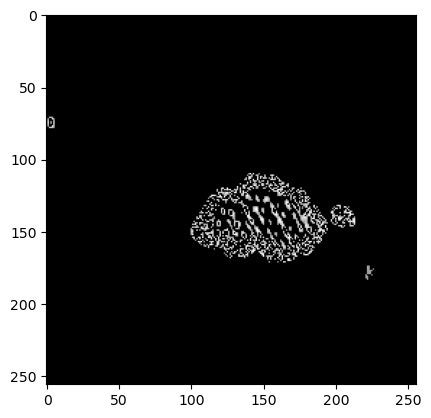

In [55]:
plt.imshow(sobel_8u,cmap = 'gray')

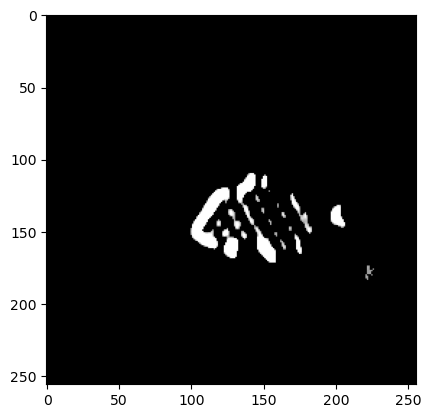

In [58]:
plt.imshow(sobelx8u,cmap = 'gray')

In [82]:
obelx64f_aa = cv2.Sobel(sobelx8u,cv2.CV_64F,1,0,ksize=5)

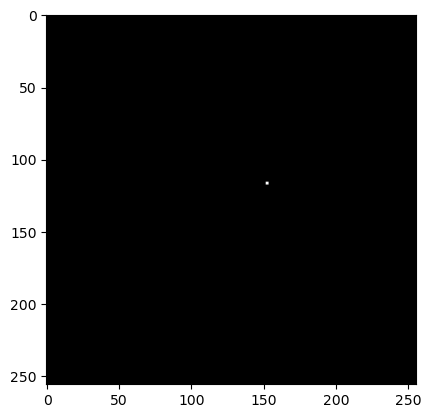

In [100]:
plt.imshow(img)

In [99]:
img[img<250]=0

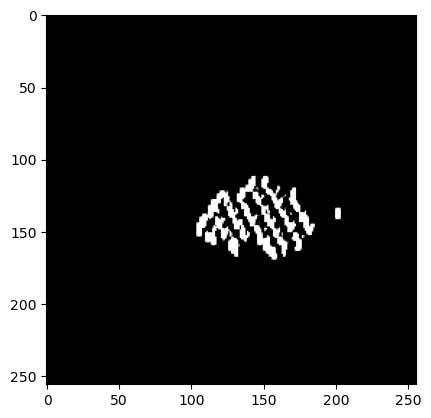

In [84]:
plt.imshow(sobelx8u,cmap = 'gray')

In [97]:
np.where(sobelx8u==255)

(array([112, 112, 112, ..., 169, 169, 169], dtype=int64),
 array([143, 143, 143, ..., 158, 158, 158], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

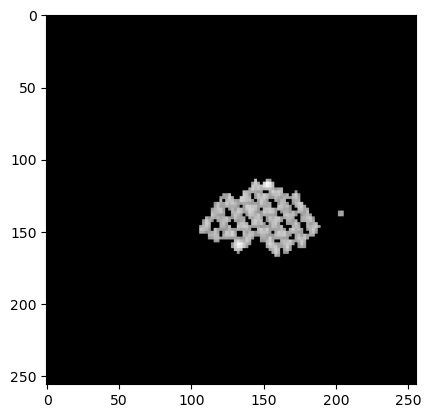

In [89]:
plt.imshow(img)

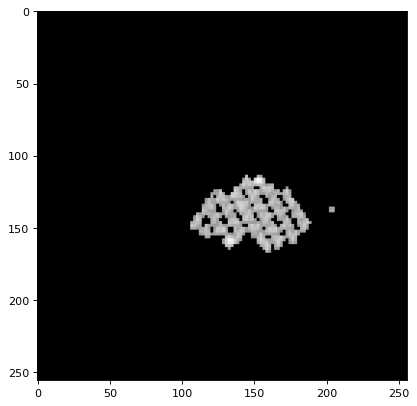

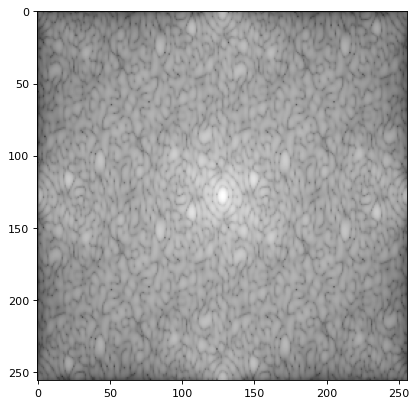

In [95]:
dark_image_grey = rgb2gray(img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

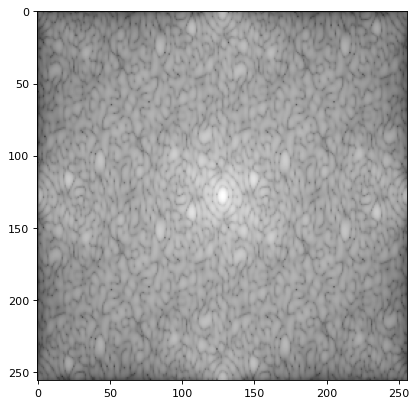

In [96]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

In [64]:
for i in range(2):
   sobelx8u = cv2.Sobel(obelx64f_aa,cv2.CV_64F,1,0,ksize=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


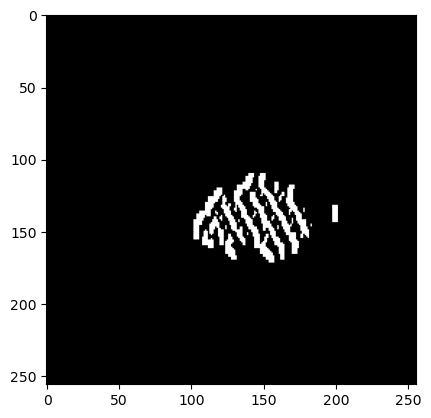

In [83]:
plt.imshow(obelx64f_aa,cmap = 'gray')

In [ ]:
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img2,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

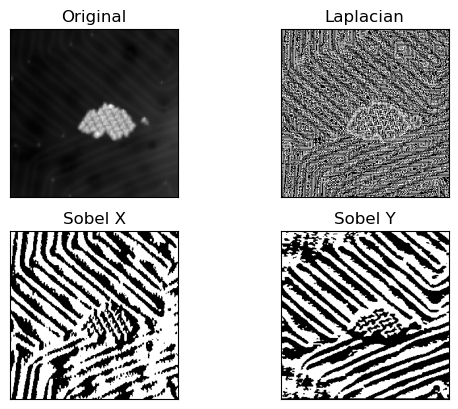

In [28]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])